# **Projet ML  par BALKIS MANSOUR**

Ce problème relève de la classification binaire car la variable cible (y) a deux classes (yes ou no). Il ne s'agit pas d'un problème de régression car nous ne cherchons pas à prédire une valeur continue.





# **🌟L' importation de la Data et L' Encodage**



In [ ]:
# Importation des bibliothèques nécessaires
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import roc_curve, auc, accuracy_score
import matplotlib.pyplot as plt

# Charger le fichier CSV depuis Dropbox
urla = "https://www.dropbox.com/scl/fi/xwf03swoc7wjrmxrl1s8v/bank-full.csv?rlkey=33hd2w1befkrjdyydlh3zp8in&st=d9x7uitx&dl=1"
dfa = pd.read_csv(urla, delimiter=';', quotechar='"')

urlt = "https://www.dropbox.com/scl/fi/xwf03swoc7wjrmxrl1s8v/bank-full.csv?rlkey=33hd2w1befkrjdyydlh3zp8in&st=thj2bqsr&dl=1"
dft = pd.read_csv(urlt, delimiter=';', quotechar='"')

# Nettoyage des colonnes
dfa.columns = dfa.columns.str.strip().str.replace('"', '')
dft.columns = dft.columns.str.strip().str.replace('"', '')

# Transformation des variables catégoriques
dfa = pd.get_dummies(dfa, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'])
dft = pd.get_dummies(dft, columns=['job', 'marital', 'education', 'contact', 'month', 'poutcome'])

# Encodage des colonnes binaires
le = LabelEncoder()
for column in ['default', 'housing', 'loan', 'y']:
    dfa[column] = le.fit_transform(dfa[column])
    dft[column] = le.fit_transform(dft[column])

# Séparation des features et de la cible
X_train = dfa.drop(columns=['y'])
y_train = dfa['y']
X_test = dft.drop(columns=['y'])
y_test = dft['y']




**Proportions de chaque classe**

In [ ]:
print(dfa['y'].value_counts(normalize=True))


y
0    0.883015
1    0.116985
Name: proportion, dtype: float64


↘ **Remarque**❗: **Les classes ne sont pas equilibrées**





# L' application  du modèle ***DecisionTreeClassifier***


 **1. Chercher le meilleur seuil pour ce modèle**





In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

model = DecisionTreeClassifier(max_depth=4,
                               min_samples_split=20,
                               min_samples_leaf=10,
                               criterion='entropy',
                               class_weight='balanced',
                               random_state=42)
model.fit(X_train, y_train)


y_pred = model.predict(X_test)




# Ajuster le seuil de décision
from sklearn.metrics import accuracy_score

# Obtenir les probabilités de prédiction
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilité pour la classe positive (Souscrit)

# Tester différents seuils
thresholds = [0.3, 0.4, 0.5, 0.6, 0.7]
for t in thresholds:
    y_pred_threshold = (y_prob >= t).astype(int)  # Appliquer le seuil
    acc = accuracy_score(y_test, y_pred_threshold)  # Calculer l'accuracy
    print(f"Accuracy avec seuil {t}: {acc:.4f}")



Accuracy avec seuil 0.3: 0.5020
Accuracy avec seuil 0.4: 0.7290
Accuracy avec seuil 0.5: 0.7290
Accuracy avec seuil 0.6: 0.8773
Accuracy avec seuil 0.7: 0.8883


**2. Application du modèle avec le meilleur seuil et étude de ses performances**


 Accuracy avec seuil 0.7: 0.8883


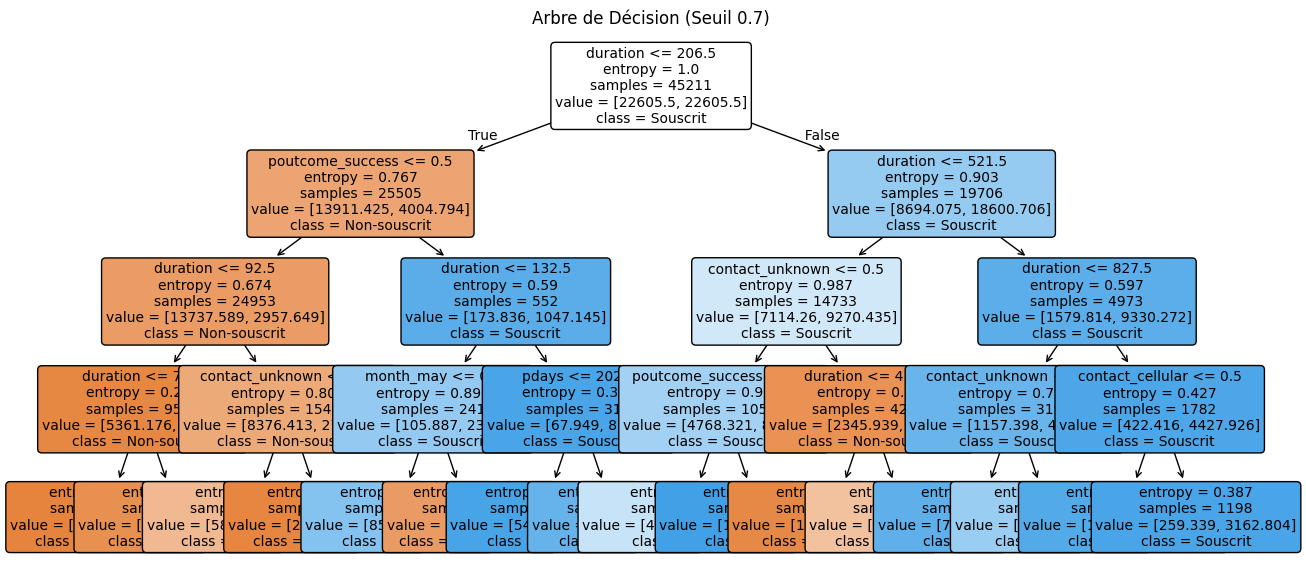

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

# Entraînement du modèle
model = DecisionTreeClassifier(max_depth=4,
                               min_samples_split=20,
                               min_samples_leaf=10,
                               criterion='entropy',
                               class_weight='balanced',
                               random_state=42)

model.fit(X_train, y_train)


# Obtenir les probabilités de prédiction
y_prob = model.predict_proba(X_test)[:, 1]  # Probabilité d'appartenir à la classe "Souscrit"

# Appliquer le seuil optimal (0.7)
seuil = 0.7
y_pred = (y_prob >= seuil).astype(int)
# Calculer l'accuracy avec le seuil ajusté
final_accuracy = accuracy_score(y_test, y_pred)
print(f"\n Accuracy avec seuil {seuil}: {final_accuracy:.4f}")
plt.figure(figsize=(15, 7))
plot_tree(model,
          filled=True,
          feature_names=X_train.columns,
          class_names=['Non-souscrit', 'Souscrit'],
          rounded=True,
          fontsize=10)

plt.title(f'Arbre de Décision (Seuil {seuil})')
plt.show()


**Remarques:**

🏴: augmentant profondeur Auc s'améliore et aussi Acurracy

🏴:  En ajoutant class_weight='balanced' l'Accuracy passe de 0,9 à 0.72

❗**AUC = 0.86** indique que le modèle est performant mais peut encore être amélioré.


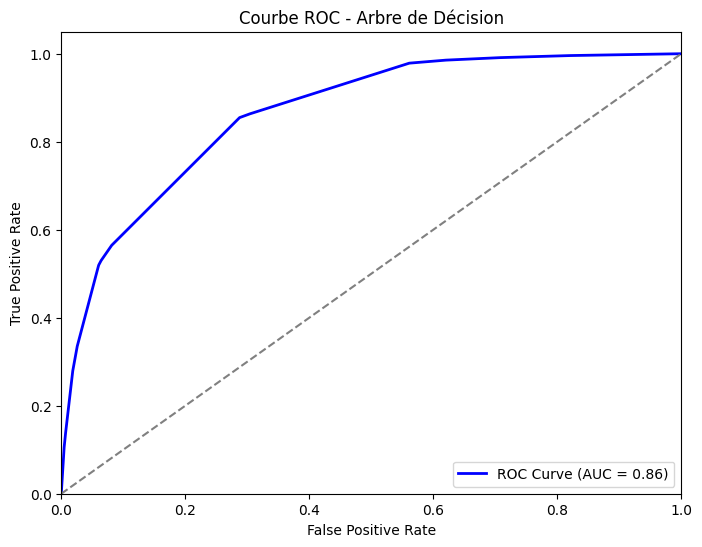

In [ ]:
from sklearn.metrics import accuracy_score, roc_curve, auc
fpr, tpr, _ = roc_curve(y_test, y_prob)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Courbe ROC - Arbre de Décision")
plt.legend(loc="lower right")
plt.show()



Calcul de **l'importance**    de chaque attribut

In [ ]:
importances = model.feature_importances_
feature_importances_df = pd.DataFrame({
    'Attribut': X_train.columns,
    'Importance': importances
})
feature_importances_df = pd.DataFrame({
    'Attribut': X_train.columns,
    'Importance': importances
})

feature_importances_df = feature_importances_df.sort_values(by='Importance', ascending=False)

best_feature = feature_importances_df.iloc[0]
print(f"\nLe meilleur attribut est : {best_feature['Attribut']} avec une importance de {best_feature['Importance']:.4f}")




Le meilleur attribut est : duration avec une importance de 0.6377


# L'application du modèle **Random Forest**

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(n_estimators=100, max_depth=10, random_state=42,class_weight='balanced')
rf_model.fit(X_train, y_train)
y_pred = rf_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f" Accuracy: {accuracy:.4f}")


 Accuracy: 0.8575


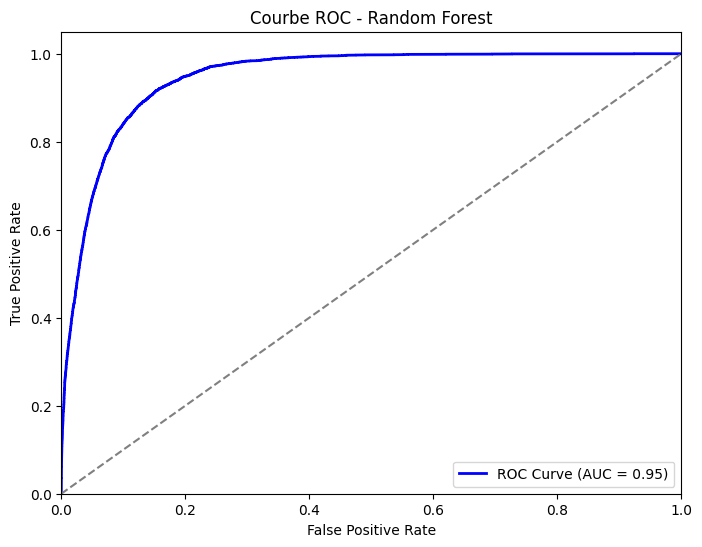

In [ ]:
from sklearn.metrics import roc_curve, auc

y_proba = rf_model.predict_proba(X_test)[:, 1]
fpr, tpr, _ = roc_curve(y_test, y_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color="blue", lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color="gray", linestyle="--")  # Diagonale aléatoire
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Courbe ROC - Random Forest")
plt.legend(loc="lower right")
plt.show()


**Remarques:**

▶Avec class_weight='balanced' l'Accuracy passe de 0.95 à 0.85

⭐Random Forest, un ensemble d'arbres de décision qui réduit le sur-ajustement et améliore la précision, offre une performance solide avec une accuracy de 85.75% et un AUC de 0.95, démontrant une excellente capacité de distinction entre les classes et une meilleure généralisation par rapport à un arbre de décision unique.

# L' application du modèle **SVM**

**1. SVM linéaire**

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()


X_train_scaled = scaler.fit_transform(X_train)


X_test_scaled = scaler.transform(X_test)
from sklearn.svm import LinearSVC

svm_linear = LinearSVC(class_weight='balanced', C=10, max_iter=10000,verbose=1)
svm_linear.fit(X_train_scaled, y_train)

y_pred = svm_linear.predict(X_test_scaled)
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print(f" Précision du SVM linéaire après scaling : {accuracy:.4f}")



[LibLinear] Précision du SVM linéaire après scaling : 0.8504


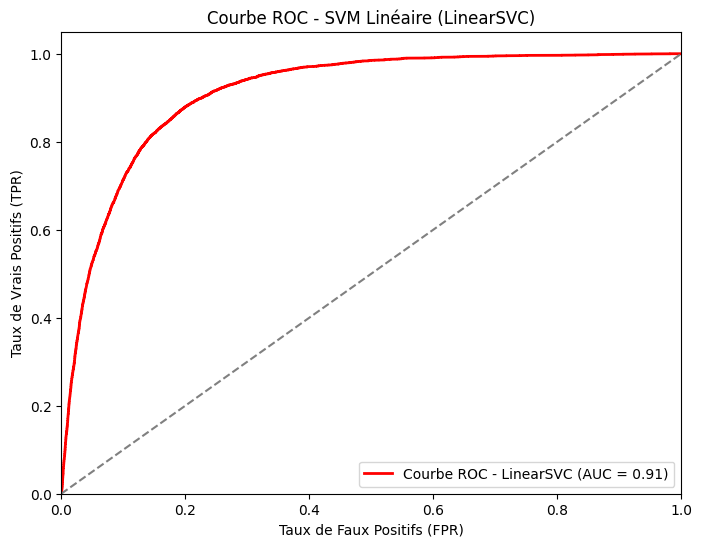

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_scores_linear = svm_linear.decision_function(X_test_scaled)
fpr_linear, tpr_linear, _ = roc_curve(y_test, y_scores_linear)
roc_auc_linear = auc(fpr_linear, tpr_linear)
plt.figure(figsize=(8,6))
plt.plot(fpr_linear, tpr_linear, color='red', lw=2, label=f'Courbe ROC - LinearSVC (AUC = {roc_auc_linear:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')  # Diagonale du hasard
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC - SVM Linéaire (LinearSVC)')
plt.legend(loc="lower right")
plt.show()


**2.  SVM non linéaire**

**A.  Recherche de meilleurs paramètres du model SVM non linéaire**

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.utils import shuffle
import numpy as np
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

#  Étape 1 : Réduire les données UNIQUEMENT pour la recherche d'hyperparamètres
sample_size = 5000  # Prendre un sous-échantillon pour RandomizedSearchCV
X_sample, y_sample = shuffle(X_train_scaled, y_train, random_state=42)
X_sample = X_sample[:sample_size]
y_sample = y_sample[:sample_size]

param_dist = {
    'C': [0.1, 1, 10],
    'gamma': [0.01, 0.1, 1]  }


random_search = RandomizedSearchCV(
    SVC(kernel='rbf', class_weight='balanced'),
    param_distributions=param_dist,
    n_iter=5,
    cv=2,
    scoring='accuracy',
    verbose=2,
    n_jobs=-1
)

random_search.fit(X_sample, y_sample)




Fitting 2 folds for each of 5 candidates, totalling 10 fits


RandomizedSearchCV(cv=2, estimator=SVC(class_weight='balanced'), n_iter=5,
                   n_jobs=-1,
                   param_distributions={'C': [0.1, 1, 10],
                                        'gamma': [0.01, 0.1, 1]},
                   scoring='accuracy', verbose=2)

🧡**meilleurs C = 10 et gamma = 1**

**B. Application du modèle SVM non lineaire et étude de ses performances**

In [ ]:
from sklearn.svm import SVC

svm_rbf = SVC(kernel='rbf', class_weight='balanced', C=10, gamma=1, max_iter=10000,tol=1e-2,verbose=1)

svm_rbf.fit(X_train_scaled, y_train)

y_pred_rbf = svm_rbf.predict(X_test_scaled)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy : {accuracy:.4f}")

[LibSVM]

/usr/local/lib/python3.11/dist-packages/sklearn/svm/_base.py:305: ConvergenceWarning: Solver terminated early (max_iter=10000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Accuracy : 0.8504


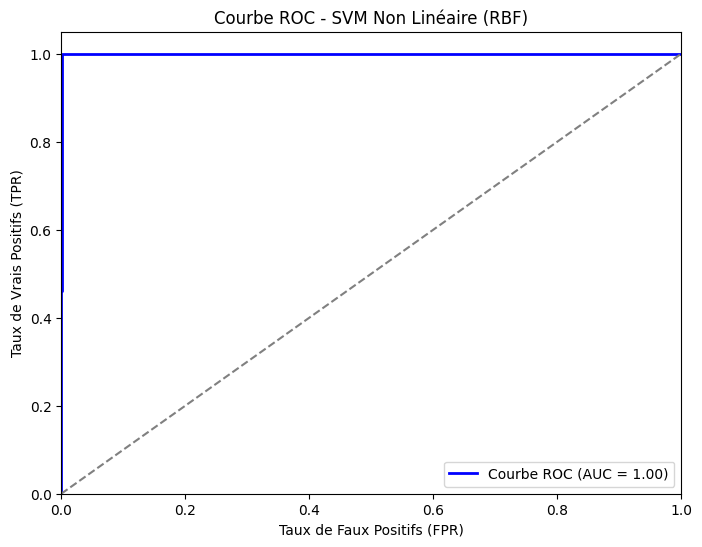

In [ ]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
y_scores = svm_rbf.decision_function(X_test_scaled)
fpr, tpr, _ = roc_curve(y_test, y_scores)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'Courbe ROC (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de Faux Positifs (FPR)')
plt.ylabel('Taux de Vrais Positifs (TPR)')
plt.title('Courbe ROC - SVM Non Linéaire (RBF)')
plt.legend(loc="lower right")
plt.show()


**3.  Remarque ❗: Les modèles SVM linéaire (LinearSVC) et SVM non linéaire avec noyau RBF (SVC(kernel='rbf')) ont tous deux atteint une précision de 85,04 %. Cependant, le SVM linéaire s'entraîne plus rapidement et il est plus facile à interpréter.Bien que le SVM RBF ait une AUC de 1,00, cela peut indiquer un surajustement, surtout si les données sont linéairement séparables. Dans ce cas, le SVM linéaire est  préférable en raison de sa simplicité et de sa rapidité et son Auc est  raisonnable**

# Application du modèle **LogisticRegression**

Accuracy: 0.8450
AUC: 0.9109


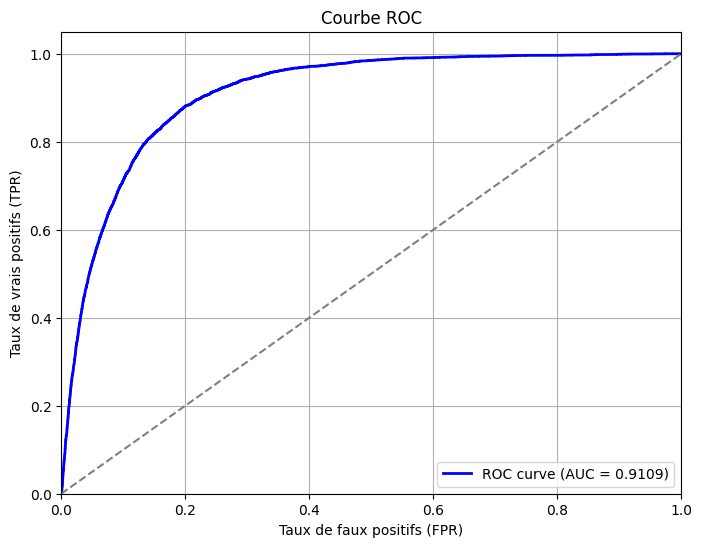

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, roc_auc_score, classification_report, confusion_matrix

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)
log_reg = LogisticRegression(max_iter=1000, random_state=42,class_weight='balanced')
log_reg.fit(X_train_scaled, y_train)
y_pred = log_reg.predict(X_test_scaled)
y_pred_proba = log_reg.predict_proba(X_test_scaled)[:, 1]
accuracy = accuracy_score(y_test, y_pred)
auc = roc_auc_score(y_test, y_pred_proba)
print(f"Accuracy: {accuracy:.4f}")
print(f"AUC: {auc:.4f}")
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.4f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Taux de faux positifs (FPR)')
plt.ylabel('Taux de vrais positifs (TPR)')
plt.title('Courbe ROC')
plt.legend(loc='lower right')
plt.grid()
plt.show()









**Remarque**: ❗

Baisse de l'accuracy (0.91 → 0.845) due à l'ajout de class_weight='balanced', indiquant un meilleur équilibre mais un compromis sur la précision globale.


**Comparaison des modèles 📉 :**

**Decision Tree** : AUC 0.86, Accuracy 0.87 → Moins performant en termes de discrimination.

**Random Forest** : AUC 0.95, Accuracy 0.8575 → Meilleure capacité de discrimination (meilleur AUC), même si l’accuracy est légèrement inférieure au Decision Tree.

**SVM linéaire**: AUC 0.91, Accuracy 0.854 → Bonne discrimination, mais inférieur à Random Forest.

**Logistic Regression**: AUC 0.91, Accuracy 0.845 → Similaire au SVM, mais légèrement moins performant.

# **Conclusion ⭐**

 D'après les 4 modèles utilisés, **Le Random Forest** est **le meilleur choix**, car il offre le meilleur AUC (0.95), garantissant une excellente capacité de discrimination, et une accuracy (0.8575) compétitive par rapport aux autres modèles.
